 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [92]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

# Reading S&P 500 Closing Prices

import pandas as pd

algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [93]:
# Reading whale returns
import pandas as pd
whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True)

In [94]:
# Count nulls
whale_null_counts = whale_returns.isnull().sum()

In [95]:
# Drop nulls
whale_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [96]:
# Reading algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True)

In [97]:
# Count nulls
algo_null_counts = algo_returns.isnull().sum()

In [98]:
# Drop nulls
algo_returns.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [99]:
# Reading S&P 500 Closing Prices

import pandas as pd

# Specifying the date format too match sp500_history '23-Apr-19'
date_format = '%d-%b-%y'

# Read the CSV file with the specified date format using the 'date_format' argument
sp500_history = pd.read_csv('sp500_history.csv', index_col='Date', parse_dates=True, date_format=date_format)


In [100]:
# Check Data Types
print(sp500_history.columns)

Index(['Close'], dtype='object')


In [101]:
# Fixing the data types by removing the dollar symbol and commas, and converting to float
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').str.replace(',', '').astype(float)

In [102]:
# Calculate Daily Returns based on 'S&P 500 Close' column
sp500_history['S&P 500 Daily Returns'] = sp500_history['Close'].pct_change()

In [103]:
# Drop nulls
sp500_history.dropna(subset=['S&P 500 Daily Returns'], inplace=True)

In [104]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.columns = ['S&P 500 Close', 'S&P 500 Daily Returns']


## Combine Whale, Algorithmic, and S&P 500 Returns

In [105]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns,algo_returns,sp500_history], axis=1)


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

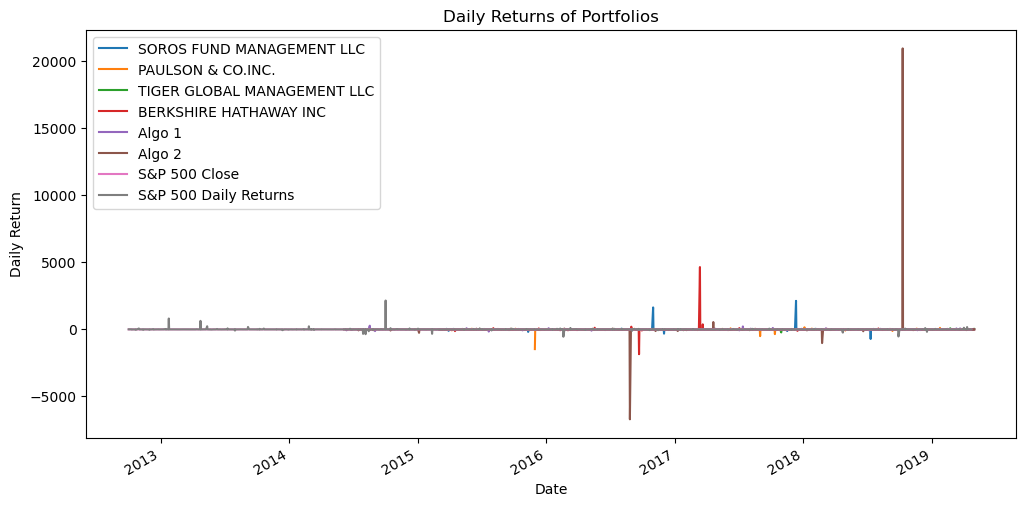

In [106]:
# Fill missing values with 0 before calculating daily returns
combined_returns.fillna(0, inplace=True)
# Calculate daily returns of all portfolios
daily_returns = combined_returns.pct_change()

# Plot daily returns of all portfolios
daily_returns.plot(figsize=(12, 6), title="Daily Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()


#### Calculate and Plot cumulative returns.

/Users/neilbaride/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


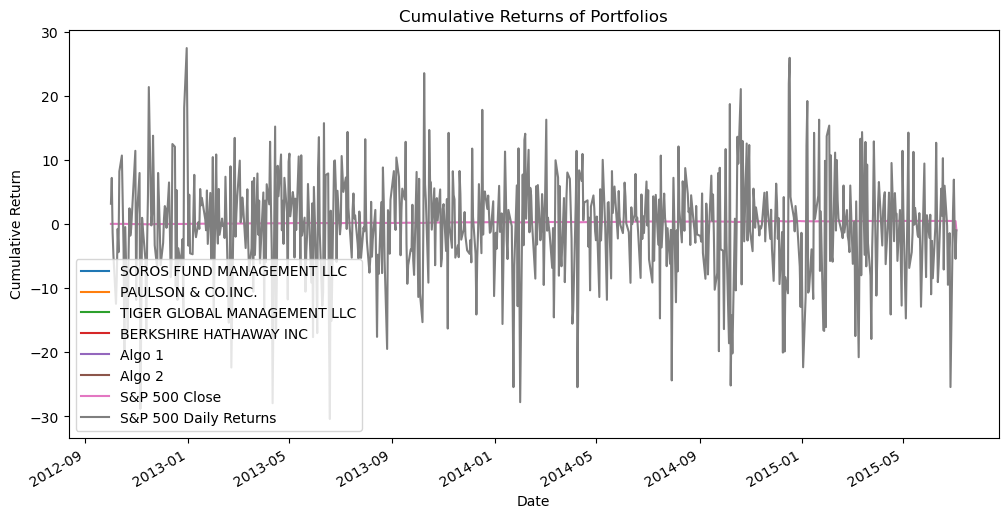

Missing Values in Cumulative Returns:
SOROS FUND MANAGEMENT LLC      1615
PAULSON & CO.INC.              1615
TIGER GLOBAL MANAGEMENT LLC    1615
BERKSHIRE HATHAWAY INC         1615
Algo 1                         1393
Algo 2                         1393
S&P 500 Close                   973
S&P 500 Daily Returns           973
dtype: int64


In [107]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Check for missing values in cumulative_returns
missing_values = cumulative_returns.isnull().sum()

# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 6), title="Cumulative Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.show()

# Print the number of missing values
print("Missing Values in Cumulative Returns:")
print(missing_values)


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


/Users/neilbaride/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


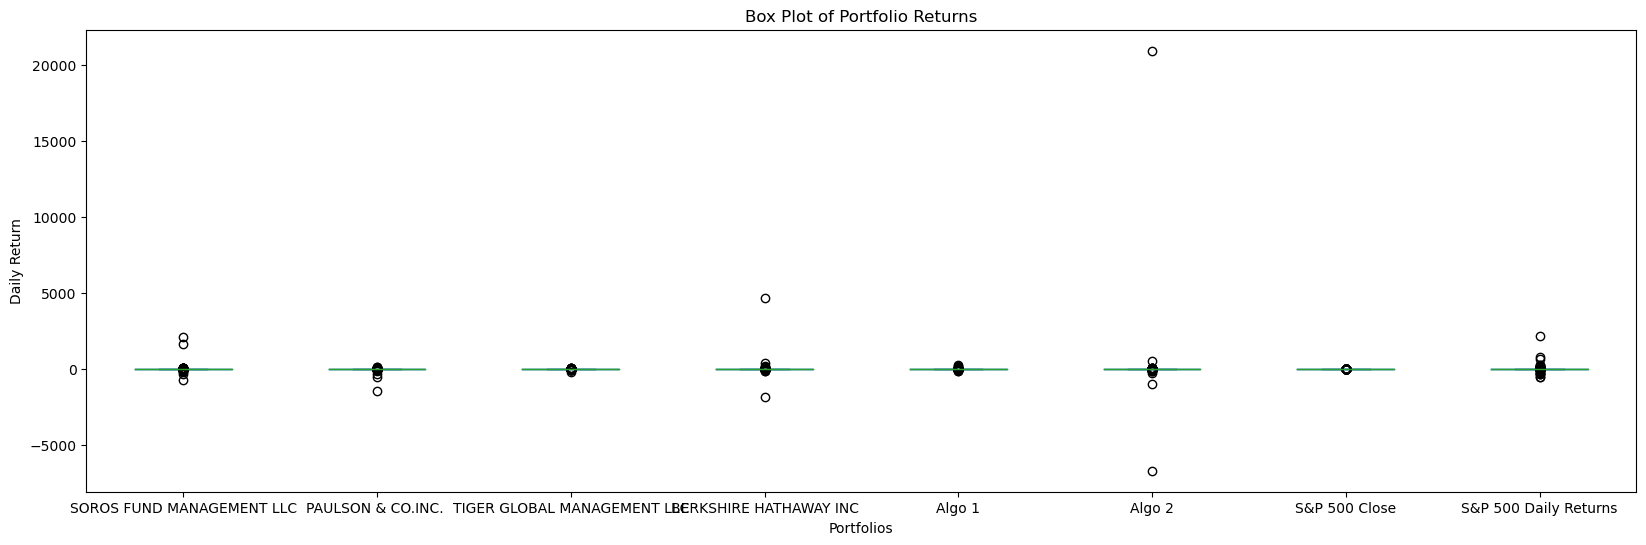

In [108]:
import numpy as np

# Box plot to visually show risk
# Step 1: Create a Box Plot for Each Portfolio
daily_returns.plot(kind='box', figsize=(20, 6), title="Box Plot of Portfolio Returns")
plt.xlabel("Portfolios")
plt.ylabel("Daily Return")
plt.show()


### Calculate Standard Deviations

In [109]:
# Calculate the daily standard deviations of all portfolios
# Step 2: Calculate the Standard Deviation for All Portfolios
portfolio_stddev = daily_returns.std()

### Determine which portfolios are riskier than the S&P 500

In [110]:
# Calculate  the daily standard deviation of S&P 500
# Step 3: Determine Which Portfolios are Riskier Than the S&P 500
sp500_stddev = daily_returns['S&P 500 Daily Returns'].std()
riskier_portfolios = portfolio_stddev[portfolio_stddev > sp500_stddev]

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
# Box plot to visually show risk for each portfolio

annualized_stddev.plot(kind='box', figsize=(12,6), title="Box Plot of Annualized Standard Deviation")
plt.ylabel("Annualized Standard Deviation")
plt.show()

# Print the results
print("Standard Deviation of Portfolios:")
print(portfolio_stddev)
print("\nPortfolios Riskier Than S&P 500:")
print(riskier_portfolios)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

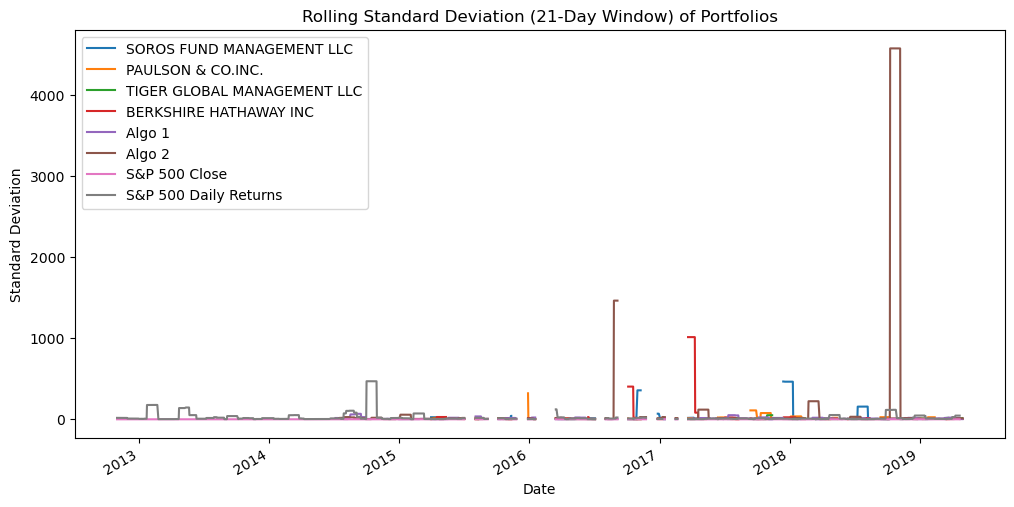

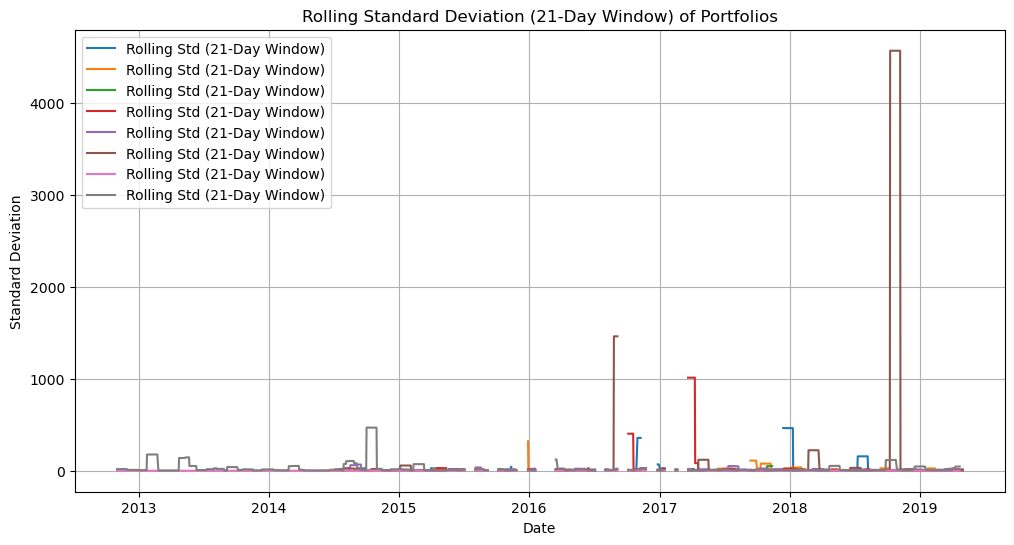

In [112]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(12, 6), title="Rolling Standard Deviation (21-Day Window) of Portfolios")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.show()

# Plot the rolling standard deviation
rolling_std = daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(rolling_std.index, rolling_std, label='Rolling Std (21-Day Window)')
plt.title("Rolling Standard Deviation (21-Day Window) of Portfolios")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.legend()
plt.grid(True)
plt.show()


### Calculate and plot the correlation

Correlation Matrix of Daily Returns:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.002961   
PAULSON & CO.INC.                             0.002961            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.022274            0.035628   
BERKSHIRE HATHAWAY INC                        0.000444            0.002020   
Algo 1                                        0.000424            0.005817   
Algo 2                                       -0.005749            0.010883   
S&P 500 Close                                 0.004354           -0.003250   
S&P 500 Daily Returns                         0.040038            0.002637   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.022274   
PAULSON & CO.INC.                               0.035628   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY I

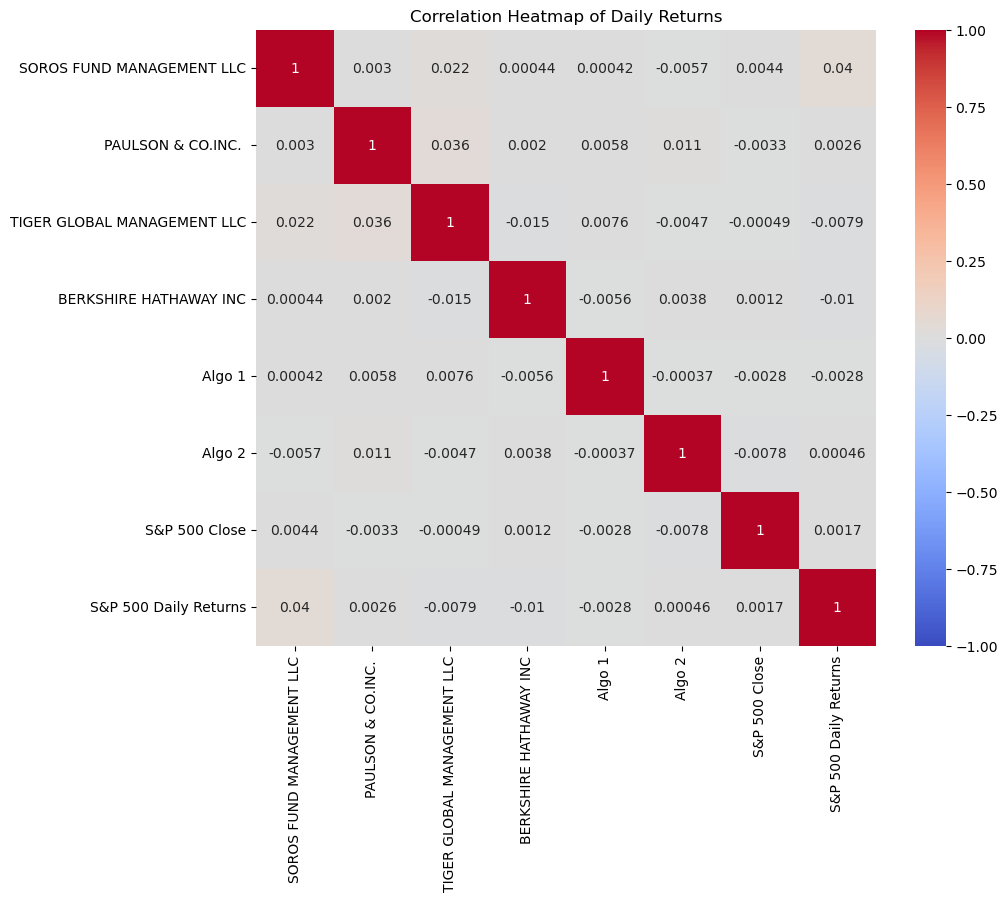

In [113]:
# Calculate daily returns of all portfolios
daily_returns = combined_returns.pct_change()

# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

# Display the correlation matrix
print("Correlation Matrix of Daily Returns:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Daily Returns")
plt.show()




### Calculate and Plot Beta for a chosen portfolio and the S&P 500

/Users/neilbaride/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


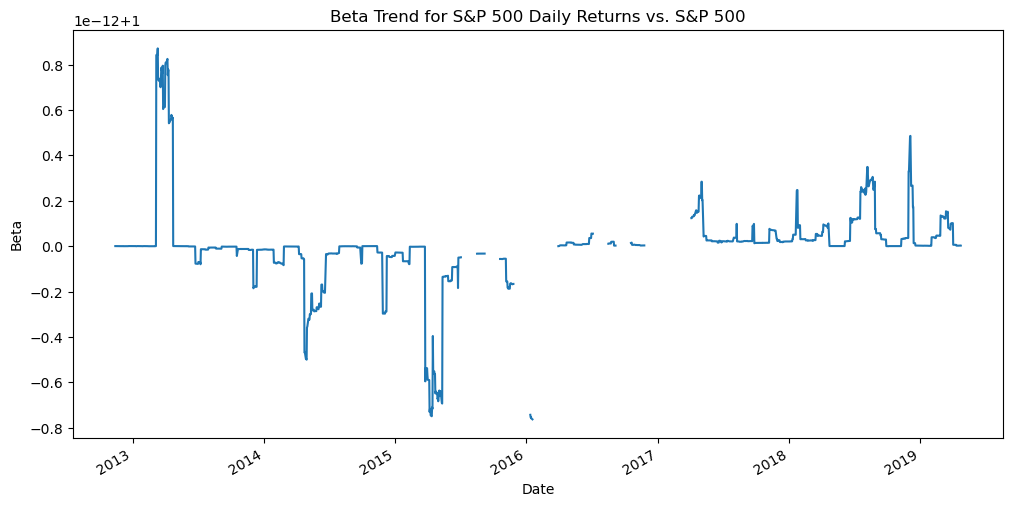

In [114]:
# Calculate daily returns of all portfolios
daily_returns = combined_returns.pct_change()

# Choose a portfolio from your combined dataset
chosen_portfolio = 'S&P 500 Daily Returns'

# Calculate the covariance between the chosen portfolio's daily returns and the S&P 500 daily returns
covariance = daily_returns[chosen_portfolio].cov(daily_returns['S&P 500 Daily Returns'])

# Calculate the variance of the S&P 500 daily returns
variance = daily_returns['S&P 500 Daily Returns'].var()

# Compute beta
beta = covariance / variance

# Plot beta trend over time
beta_trend = daily_returns[chosen_portfolio].rolling(window=30).cov(daily_returns['S&P 500 Daily Returns']) / daily_returns['S&P 500 Daily Returns'].rolling(window=30).var()
beta_trend.plot(figsize=(12, 6), title=f'Beta Trend for {chosen_portfolio} vs. S&P 500')
plt.xlabel("Date")
plt.ylabel("Beta")
plt.show()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

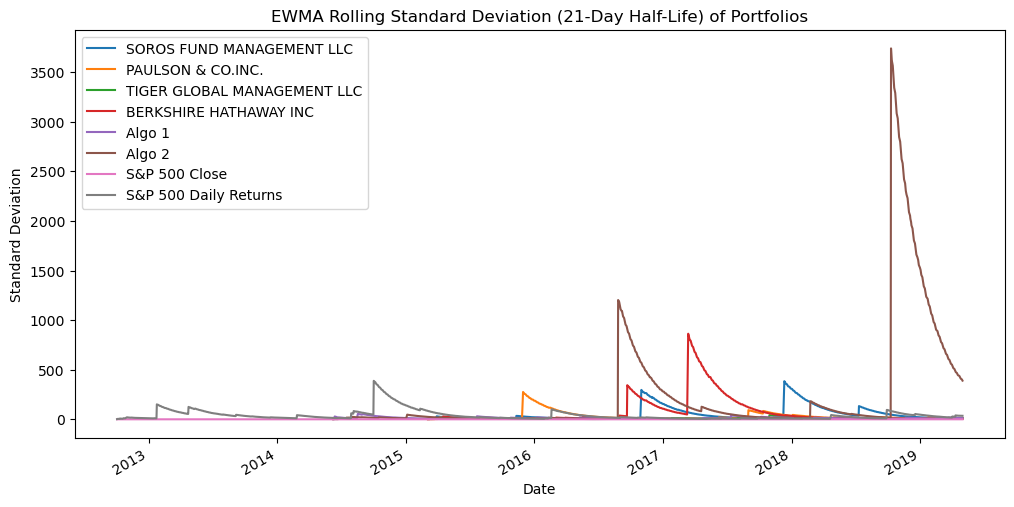

In [115]:
# Use `ewm` to calculate the rolling window

# Calculate the rolling window with EWMA for each portfolio using standard deviation
ewma_21d_std = daily_returns.ewm(halflife=21).std()

# Plot the EWMA rolling standard deviation for each portfolio
ewma_21d_std.plot(figsize=(12, 6), title="EWMA Rolling Standard Deviation (21-Day Half-Life) of Portfolios")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.show()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [122]:
import pandas as pd
import numpy as np


# Calculate the risk-free rate 
risk_free_rate = 0.10

# Calculate the excess return for each portfolio
excess_returns = daily_returns - risk_free_rate

# Calculate the annualized excess return - 252 trading days in a year
annualized_excess_return = excess_returns.mean() * 252  

# Calculate the annualized standard deviation of daily returns
annualized_stddev = daily_returns.std() * np.sqrt(252)

# Calculate the Sharpe Ratio for each portfolio
sharpe_ratios = annualized_excess_return / annualized_stddev

# Create a DataFrame to store the results
sharpe_df = pd.DataFrame({
    'Portfolio': sharpe_ratios.index,
    'Sharpe Ratio': sharpe_ratios.values

})

# Print the Sharpe Ratios for each portfolio
print(sharpe_df)# 

                     Portfolio  Sharpe Ratio
0    SOROS FUND MANAGEMENT LLC           NaN
1           PAULSON & CO.INC.            NaN
2  TIGER GLOBAL MANAGEMENT LLC           NaN
3       BERKSHIRE HATHAWAY INC           NaN
4                       Algo 1           NaN
5                       Algo 2           NaN
6                S&P 500 Close           NaN
7        S&P 500 Daily Returns           NaN


/Users/neilbaride/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


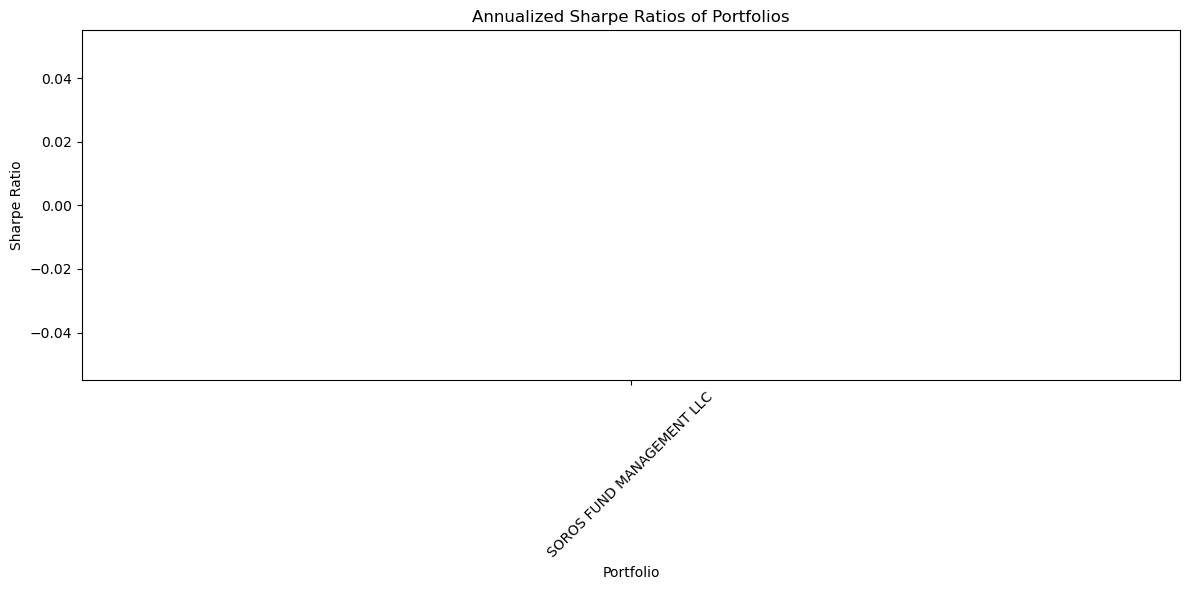

In [125]:

import matplotlib.pyplot as plt

# Visualize the Sharpe ratios as a bar plot
plt.figure(figsize=(12, 6))
plt.bar(sharpe_df['Portfolio'], sharpe_df['Sharpe Ratio'])
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Annualized Sharpe Ratios of Portfolios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Unable to genrarte the graphical representation.

---

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [71]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

In [72]:
# Reading data from 
import pandas as pd
goog_historical= pd.read_csv('goog_historical.csv' index_col='Date', parse_dates=True)
# Count nulls
 goog_historical= goog_historical.isnull().sum()
# Drop nulls
goog_historical.csv.dropna(inplace=True)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1888810687.py, line 3)

In [73]:
# Reading data from 2nd stock
import pandas as pd
aapl_historical. = pd.read_csv('aapl_historical.csv', index_col='Date', parse_dates=True)
# Count nulls
aapl_historical.csv= aapl_historical.isnull().sum()
# Drop nulls
aapl_historical..dropna(inplace=True)

SyntaxError: invalid syntax (2055932760.py, line 3)

In [74]:
# Reading data from 3rd stock
import pandas as pd
'cost_historical.csv = pd.read_csv('cost_historical.csv', index_col='Date', parse_dates=True)
# Count nulls
 'cost_historical.csv= 'cost_historical'.isnull().sum()
# Drop nulls
'cost_historical.csv.dropna(inplace=True)

SyntaxError: unterminated string literal (detected at line 3) (1908936902.py, line 3)

In [75]:
# Combine all stocks in a single DataFrame
combined_returns = pd.concat([goog_historical,aapl_historical,cost_historical], axis=1)

NameError: name 'goog_historical' is not defined

In [69]:
# Reset Date index
import pandas as pd

# Specifying the date format too match sp500_history '23-Apr-19'
date_format = '%d-%b-%y'

# Read the CSV file with the specified date format using the 'date_format' argument
= pd.read_csv('', index_col='Date', parse_dates=True, date_format=date_format)

# Fixing the data types by removing the dollar symbol and commas, and converting to float
['Close'] = ['Close'].str.replace('$', '').str.replace(',', '').astype(float)

SyntaxError: invalid syntax (2968124043.py, line 8)

In [70]:
# Reorganize portfolio data by having a column per symbol
['Close'] = ['Close'].str.replace('$', '').str.replace(',', '').astype(float)

SyntaxError: cannot assign to literal (3311910229.py, line 2)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!